In [ ]:
library('caret')

Loading required package: lattice

Loading required package: ggplot2



In [ ]:
#random_models <- sample(1:100, 10)
random_models <- c(10, 87, 30, 21, 23, 36, 83, 99, 18, 54)

In [ ]:
# reading optimal hyperparameters
files <- sapply(random_models, function(x) {
  list.files('tree_splits', pattern=paste0('results_training_s1_split', x, '.csv'), all.files=FALSE,
             full.names=T)})

optimal_params <- NULL
for (file in files) {
  split_frame <- read.csv(file)
  optimal_params <- rbind(optimal_params, split_frame[which.max(as.numeric(unlist(split_frame['Accuracy']))),])
}


# reading optimal features
files <- sapply(random_models, function(x) {
  list.files('tree_splits', pattern=paste0('features_split', x, '.csv'), all.files=FALSE,
             full.names=T)})

optimal_features <- data.frame(matrix(ncol = length(random_models), nrow = 2834))
colnames(optimal_features) <- random_models
for (i in 1:length(files)) {
  optimal_features[, toString(random_models[i])] <- read.csv(files[i], colClasses=c("NULL", NA))
}

In [ ]:
optimal_features

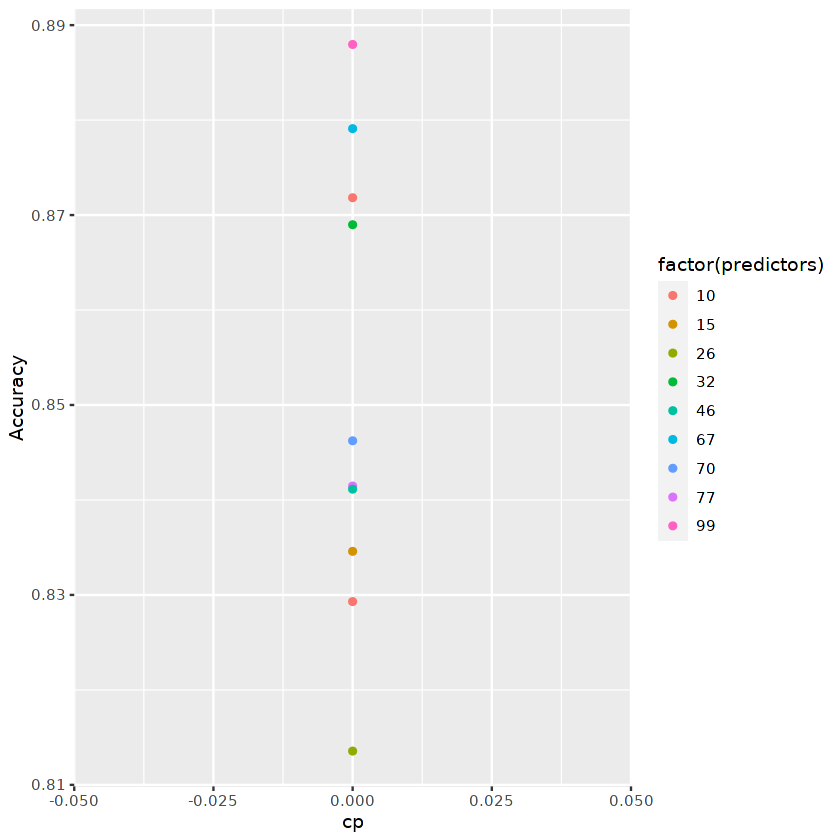

In [ ]:
ggplot(data = optimal_params, mapping = aes(x= cp, y= Accuracy, color = factor(predictors))) + geom_point()

In [ ]:
# load the data 
x_train = read.delim('Train_call.txt', header = TRUE, sep = "\t", quote = "\"", dec = ".", fill = TRUE, comment.char = "")
y_train = read.delim('Train_clinical.txt', header = TRUE, sep = "\t", quote = "\"", dec = ".", fill = TRUE, comment.char = "", row.names = 1)

x_train = t(x_train)

data <- merge(y_train, x_train[5:nrow(x_train),], by = 'row.names')
row.names(data) <- data$Row.names
data$Row.names <- NULL

set.seed(123)

In [ ]:
rownames(x_train)

[1] "Chromosome" "Start"      "End"        "Nclone"     "Array.129" 
  [6] "Array.34"   "Array.67"   "Array.24"   "Array.22"   "Array.36"  
 [11] "Array.49"   "Array.16"   "Array.146"  "Array.143"  "Array.65"  
 [16] "Array.62"   "Array.4"    "Array.76"   "Array.118"  "Array.154" 
 [21] "Array.48"   "Array.6"    "Array.39"   "Array.86"   "Array.112" 
 [26] "Array.79"   "Array.124"  "Array.19"   "Array.27"   "Array.106" 
 [31] "Array.110"  "Array.69"   "Array.73"   "Array.95"   "Array.98"  
 [36] "Array.17"   "Array.33"   "Array.138"  "Array.149"  "Array.101" 
 [41] "Array.90"   "Array.99"   "Array.57"   "Array.105"  "Array.85"  
 [46] "Array.114"  "Array.56"   "Array.5"    "Array.8"    "Array.113" 
 [51] "Array.148"  "Array.42"   "Array.25"   "Array.102"  "Array.55"  
 [56] "Array.141"  "Array.43"   "Array.159"  "Array.52"   "Array.88"  
 [61] "Array.125"  "Array.152"  "Array.50"   "Array.23"   "Array.68"  
 [66] "Array.94"   "Array.153"  "Array.51"   "Array.142"  "Array.144" 
 [71] "Array.37"   "Array.78"   "Array.18"   "Array.82"   "Array.75"  
 [76] "Array.139"  "Array.2"    "Array.117"  "Array.60"   "Array.38"  
 [81] "Array.72"   "Array.104"  "Array.137"  "Array.145"  "Array.31"  
 [86] "Array.135"  "Array.111"  "Array.7"    "Array.21"   "Array.53"  
 [91] "Array.59"   "Array.71"   "Array.47"   "Array.107"  "Array.64"  
 [96] "Array.89"   "Array.30"   "Array.35"   "Array.93"   "Array.10"  
[101] "Array.123"  "Array.100"  "Array.134"  "Array.130"

In [ ]:
colnames(y_train)

[1] "Subgroup"

In [ ]:
ncol(x_train)

[1] 2834

In [ ]:
head(x_train)

Chromosome,1,1,1,1,1,1,1,1,1,1,⋯,23,23,23,23,23,23,23,23,23,23
Start,2927,85022,370546,471671,792533,912799,1271190,1676445,1738295,2481927,⋯,151067607,152422390,152552851,152576854,152994680,153062077,153466463,153504394,153938998,153997146
End,43870,216735,372295,786483,907406,1266212,1590570,1703748,2477597,2562342,⋯,152416606,152548587,152570071,152935130,153054487,153452633,153491568,153933426,153989329,154492924
Nclone,3,4,4,5,13,96,45,4,104,14,⋯,159,20,6,64,5,57,4,55,5,43
Array.129,0,0,0,0,0,0,0,0,0,0,⋯,2,2,2,2,0,1,1,1,1,1
Array.34,0,0,0,0,0,0,0,0,0,0,⋯,1,1,1,1,1,1,1,1,1,1


In [ ]:
# final model training
tree_final_models <- list()
for (opt in 1:nrow(optimal_params)) {
  opt_features <- optimal_features[,opt]
  opt_params <- optimal_params[opt,]
  
  train_control <- trainControl(method="none")
  tuneGrid = expand.grid(cp = optimal_params$cp)
  
  temp_data <- data[,c('Subgroup', opt_features[1:opt_params$predictors])]
  tree_final_models[[opt]] <- train(Subgroup ~., data = temp_data, method = opt_params$method, trControl = train_control, 
                                    tuneGrid = tuneGrid)    
}
saveRDS(tree_final_models, file = "tree-models.rds")

In [ ]:
tree_final_models[[1]]$results

Accuracy,Kappa,cp
<dbl>,<dbl>,<dbl>


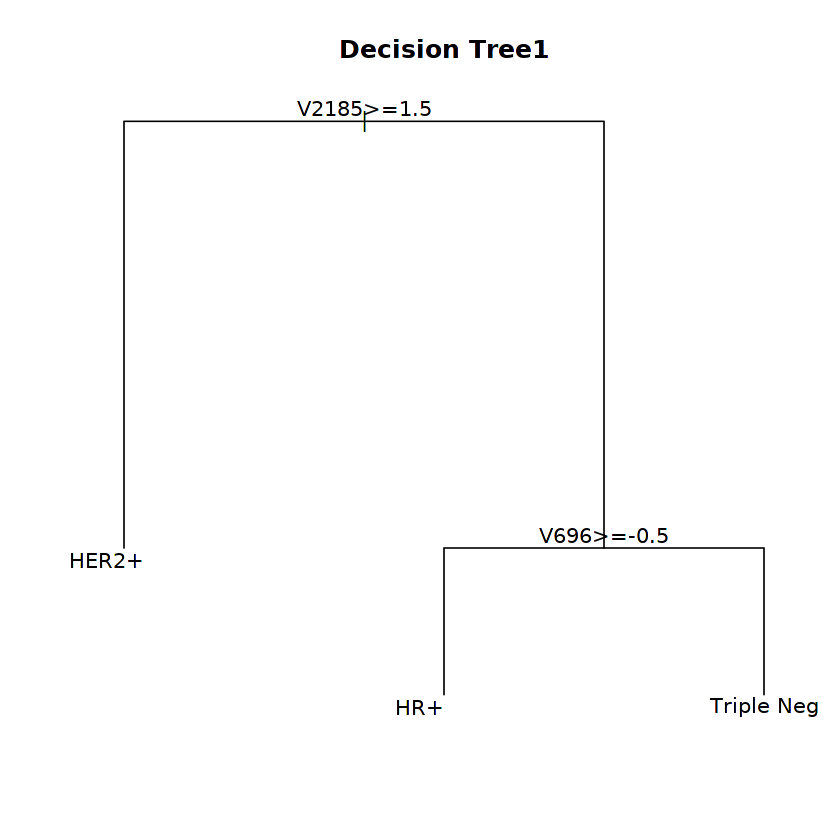

In [ ]:
# trained models
par(xpd = NA)
plot(tree_final_models[[1]]$finalModel, main="Decision Tree1")
text(tree_final_models[[1]]$finalModel)


In [ ]:
# accuracies of all 100 models
accuracies <- read.csv("~/work/tree_splits/overall_accuracies.csv", header = TRUE)
head(accuracies)

,X,x
,<int>,<dbl>
1,1,0.6842105
2,2,0.6315789
3,3,0.7368421
4,4,0.7368421
5,5,0.7368421
6,6,0.7368421


In [ ]:
hist(overall_accuracies)

ERROR: Error in histogram(overall_accuracies): could not find function "histogram"


In [ ]:
mean(accuracies[,2])

[1] 0.7094737

In [ ]:
median(accuracies[,2])

[1] 0.7368421

In [ ]:
## Finding genome regions
require(data.table)
gene <-as.data.frame(fread("BasepairToGeneMap.tsv"))
head(gene)

Loading required package: data.table



,ENSEMBL_gene_id,Chromosome,Gene_start,Gene_end,HGNC_symbol
,<chr>,<chr>,<int>,<int>,<chr>
1,ENSG00000219789,1,1873,3533,RP11-34P13.1
2,ENSG00000146556,1,4274,19669,AL627309.15-1
3,ENSG00000221311,1,20229,20366,hsa-mir-1302-2
4,ENSG00000222027,1,24417,25944,FAM138E
5,ENSG00000222003,1,24417,25944,FAM138A
6,ENSG00000197490,1,42912,44799,AL627309.15-2


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e50088cd-08d8-40b0-8c1b-e1fc7b675864' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>